In [7]:
# Imports


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks, optimizers

## Exercise 1:  Training Deep Neural Network on MNIST

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3160 - loss: 1.9886 - val_accuracy: 0.7500 - val_loss: 0.9369
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8185 - loss: 0.7390 - val_accuracy: 0.8300 - val_loss: 0.6082
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9000 - loss: 0.4113 - val_accuracy: 0.8450 - val_loss: 0.5547
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9314 - loss: 0.2791 - val_accuracy: 0.8500 - val_loss: 0.5467
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1997 - val_accuracy: 0.8500 - val_loss: 0.5562
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9696 - loss: 0.1429 - val_accuracy: 0.8500 - val_loss: 0.5797
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9760 - loss: 0.1029 - val_accuracy: 0.8550 - val_loss: 0.6226
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9833 - loss: 0.0748 - val_accuracy: 0.8350 - val_loss

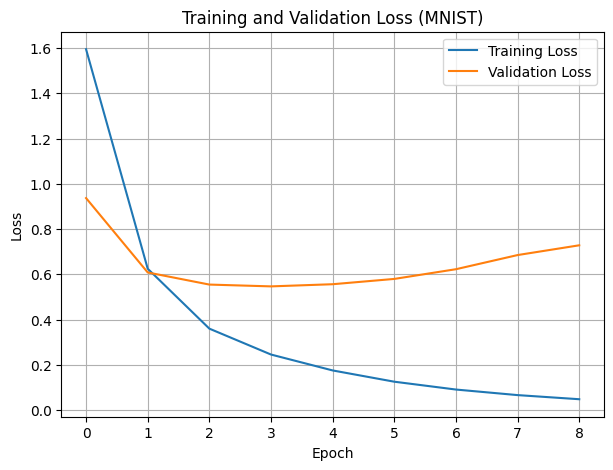

In [8]:
# Exercise 1

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Use only the first 1000 training and 200 test samples
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:200], y_test[:200]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Building the neurlal network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# Compiling tthe model
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating the model and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The model with these parameters achieved a test accuracy of 88%

## Exercise 2 Deep neural network on CIFAR-10